In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load the dataset
file_path = '/content/drive/MyDrive/Farm Project/Release/models/Breed Information system/cattle_breed_idintification_dataset.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows
df.head()


,ID,Cattle Breed Name,Pedigree/Lineage,Milk Production Ability (Liters/Year),Optimal Rearing Conditions,Origin,Physical Characteristics,Temperament,Productivity Metrics,Lifespan (Years)
0,2,JERSEY,"BRITISH BREED, DEVELOPED IN JERSEY, CHANNEL IS...",5500,"THRIVES IN WARM CLIMATES, REQUIRES GOOD GRAZIN...",SCOTLAND,"SMALL TO MEDIUM BODY, LIGHT BROWN COLOR",DOCILE AND FRIENDLY,EFFICIENT MILK PRODUCTION WITH HIGH BUTTERFAT ...,10
1,3,SAHIWAL,"ORIGINATING IN THE SAHIWAL DISTRICT OF PUNJAB,...",3000,"ADAPTED TO TROPICAL CONDITIONS, HEAT-TOLERANT",PAKISTAN,"MEDIUM SIZE, REDDISH BROWN COAT",CALM BUT CAN BE AGGRESSIVE UNDER STRESS,DUAL-PURPOSE: MILK AND DRAUGHT POWER,12
2,4,AYRSHIRE,DEVELOPED IN THE COUNTY OF AYRSHIRE IN SOUTHWE...,4500,BEST SUITED TO TEMPERATE CLIMATES,SCOTLAND,"MEDIUM SIZE, REDDISH-BROWN AND WHITE SPOTS",ALERT AND ACTIVE,HIGH MILK QUALITY WITH GOOD FAT CONTENT,8
3,5,ZEBU,CROSSBREED BETWEEN ZEBU AND EUROPEAN BREEDS (A...,4000,"THRIVES IN TROPICAL CONDITIONS, HIGH RESISTANC...",AUSTRALIA,"MEDIUM-SIZED, ZEBU CHARACTERISTICS, HEAT TOLER...","DOCILE, TOLERANT TO HARSH CONDITIONS","MODERATE MILK YIELD, RESISTANT TO DISEASE",10
4,7,ZEBU,DEVELOPED IN VARIOUS REGIONS,8526,BEST SUITED TO TEMPERATE CLIMATES,AUSTRALIA,"MEDIUM SIZE, REDDISH BROWN COAT",CALM BUT CAN BE AGGRESSIVE UNDER STRESS,HIGH MILK QUALITY WITH GOOD FAT CONTENT,6


In [1]:
# Combine text-heavy fields into a single feature
df['text_data'] = (
    df['Cattle Breed Name'] + " " +
    df['Pedigree/Lineage'] + " " +
    df['Optimal Rearing Conditions'] + " " +
    df['Physical Characteristics'] + " " +
    df['Temperament'] + " " +
    df['Productivity Metrics']
)

# Target variable
target = 'Origin'

# Check data
df[['text_data', target]].head()


NameError: name 'df' is not defined

In [ ]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text_data'],
    df[target],
    test_size=0.2,
    random_state=42
)


In [2]:
# Vectorize text data
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Transform train and test sets
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


NameError: name 'TfidfVectorizer' is not defined

In [3]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)


NameError: name 'MultinomialNB' is not defined

In [ ]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

   AUSTRALIA       0.00      0.00      0.00         7
       INDIA       0.00      0.00      0.00         5
 NETHERLANDS       0.00      0.00      0.00        10
    PAKISTAN       0.10      0.33      0.15         6
    SCOTLAND       0.00      0.00      0.00         9
   SRI LANKA       0.26      0.69      0.38        13
          UK       0.00      0.00      0.00         5
         USA       0.00      0.00      0.00         6

    accuracy                           0.18        61
   macro avg       0.05      0.13      0.07        61
weighted avg       0.07      0.18      0.10        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


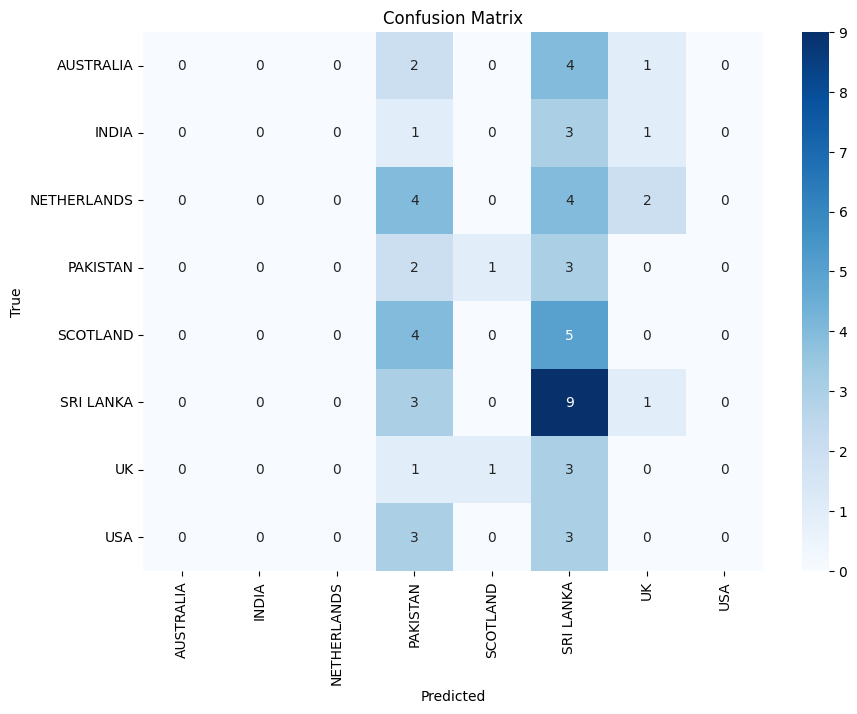

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


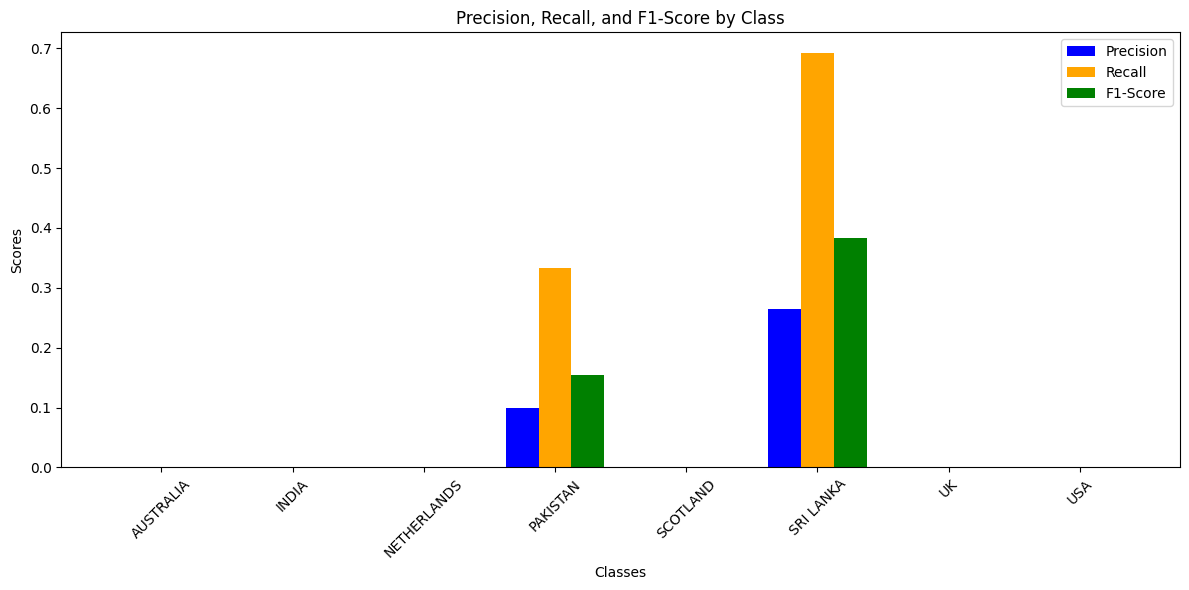

In [ ]:
import numpy as np

# Extract metrics
report = classification_report(y_test, y_pred, output_dict=True)
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [report[c]['precision'] for c in classes]
recall = [report[c]['recall'] for c in classes]
f1_score = [report[c]['f1-score'] for c in classes]

# Plot metrics
x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width, label="Precision", color='blue')
plt.bar(x, recall, width, label="Recall", color='orange')
plt.bar(x + width, f1_score, width, label="F1-Score", color='green')
plt.xticks(x, classes, rotation=45)
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("Precision, Recall, and F1-Score by Class")
plt.legend()
plt.tight_layout()
plt.show()


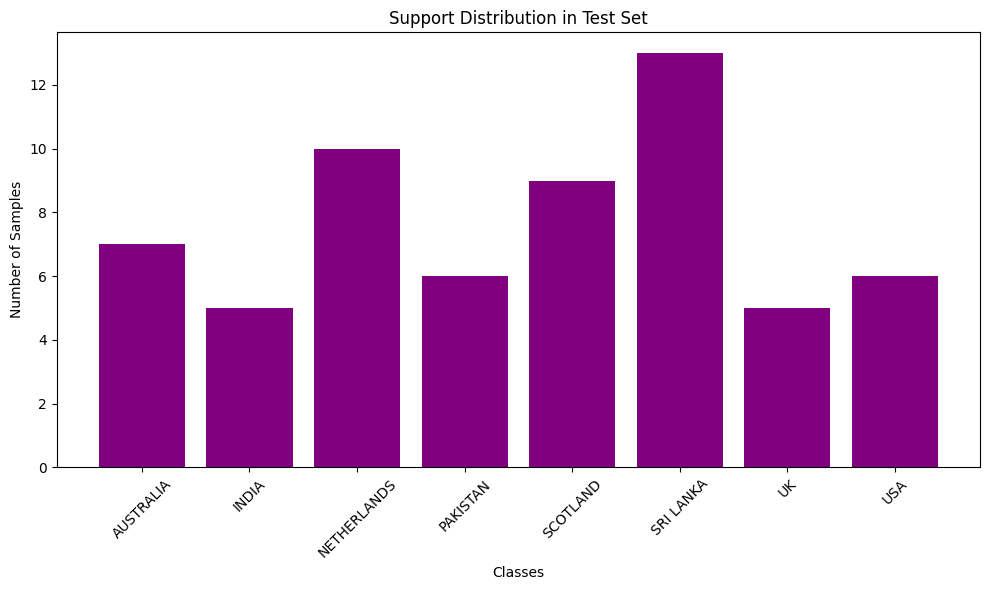

In [ ]:
# Extract support
support = [report[c]['support'] for c in classes]

# Plot support distribution
plt.figure(figsize=(10, 6))
plt.bar(classes, support, color='purple')
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.title("Support Distribution in Test Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save model and vectorizer
joblib.dump(model, 'cattle_breed_nlp_model.joblib')
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

# Download files in Colab
from google.colab import files
files.download('cattle_breed_nlp_model.joblib')
files.download('tfidf_vectorizer.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Example new data
new_data = ["JERSEY"]
new_data_tfidf = tfidf.transform(new_data)

# Predict
prediction = model.predict(new_data_tfidf)
print("Predicted Origin:", prediction)


Predicted Origin: ['NETHERLANDS']


In [ ]:
def provide_insights(breed_name, adopted, tfidf, model, df):
    """
    Provide insights based on breed name and adoption status.

    Parameters:
    - breed_name: str, Name of the breed.
    - adopted: bool, Whether the breed is adopted.
    - tfidf: TfidfVectorizer, Trained vectorizer.
    - model: Trained ML model.
    - df: DataFrame, Original dataset.

    Returns:
    - dict, Insights.
    """
    # Filter dataset for the given breed
    breed_data = df[df['Cattle Breed Name'].str.contains(breed_name, case=False, na=False)]

    if breed_data.empty:
        return {"error": "Breed not found in the dataset."}

    # Generate prediction using the model (use text_data column)
    breed_text = breed_data['text_data'].iloc[0]
    breed_tfidf = tfidf.transform([breed_text])
    predicted_origin = model.predict(breed_tfidf)[0]

    # Construct insights
    insights = {
        "Breed": breed_name,
        "Adopted": "Yes" if adopted else "No",
        "Predicted Origin": predicted_origin,
        "Rearing Conditions": breed_data['Optimal Rearing Conditions'].iloc[0],
        "Temperament": breed_data['Temperament'].iloc[0],
        "Milk Production": breed_data['Milk Production Ability (Liters/Year)'].iloc[0],
        "Lifespan": breed_data['Lifespan (Years)'].iloc[0]
    }
    return insights


In [ ]:
# Example
breed_name = "Jersey"
adopted = True

# Call the function
insights = provide_insights(breed_name, adopted, tfidf, model, df)
print("Insights:")
for key, value in insights.items():
    print(f"{key}: {value}")


Insights:
Breed: Jersey
Adopted: Yes
Predicted Origin: SCOTLAND
Rearing Conditions: THRIVES IN WARM CLIMATES, REQUIRES GOOD GRAZING PASTURES
Temperament: DOCILE AND FRIENDLY
Milk Production: 5500
Lifespan: 10


In [ ]:
from ipywidgets import interact

def interactive_insights(breed_name, adopted):
    result = provide_insights(breed_name, adopted, tfidf, model, df)
    for key, value in result.items():
        print(f"{key}: {value}")

interact(interactive_insights, breed_name="", adopted=[True, False])


interactive(children=(Text(value='', description='breed_name'), Dropdown(description='adopted', options=(True,…

<function __main__.interactive_insights(breed_name, adopted)>